# Exercise 5 - Kullback-Leibler distance from empirical distribution
1. Plot the two observed and the uniform pmfs
2. In the title write the KL divergence value 

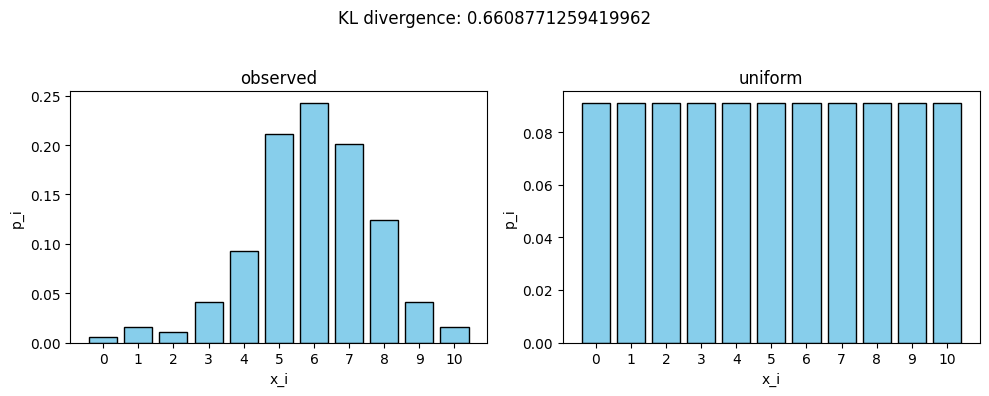

In [1]:
import matplotlib.pyplot as plt
import math
    
x = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10]

data_series = [1, 3, 2, 8, 18, 41, 47, 39, 24, 8, 3]
samples = sum(data_series)

observations = []

for i in x:
    observations.append(data_series[i] / samples)

plt.figure(figsize=(10, 4))

plt.subplot(1, 2, 1)
plt.bar(x, observations, color='skyblue', edgecolor='black')

plt.title('observed')
plt.xlabel('x_i')
plt.ylabel('p_i')

plt.xticks(range(0, 11))

uniform = [1/11, 1/11, 1/11, 1/11, 1/11, 1/11, 1/11, 1/11, 1/11, 1/11, 1/11]

plt.subplot(1, 2, 2)
plt.bar(x, uniform, color='skyblue', edgecolor='black')

plt.title('uniform')
plt.xlabel('x_i')
plt.ylabel('p_i')

plt.xticks(range(0, 11))

divergence = 0
for i in x:
    divergence += observations[i] * math.log2(observations[i] / uniform[i])

plt.suptitle(f"KL divergence: {divergence}")

plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

3. Identify the pmf at minimum KL divergence

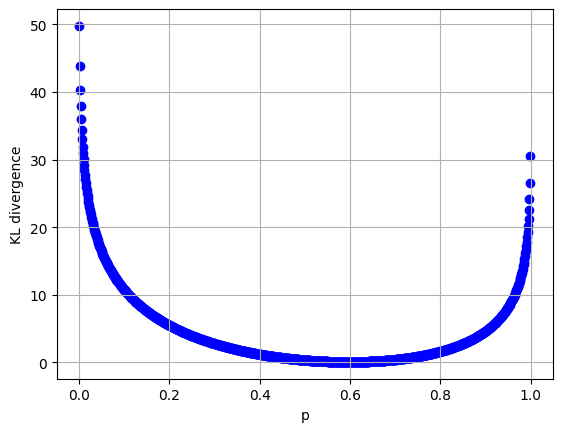

In [2]:
from scipy.stats import binom
import numpy as np

def binomial_div(p, obs):
    divergence = 0
    for i in range(11):
        prob = binom.pmf(i, 10, p)
        divergence += obs[i] * math.log2(obs[i] / prob)
    return divergence

plt.figure()

probs = np.arange(0.001, 1, 0.001)
divs = []
for i in probs:
    divs.append(binomial_div(i, observations))

plt.scatter(probs, divs, color='blue', marker='o')

plt.xlabel('p')
plt.ylabel('KL divergence')

plt.grid(True) 
plt.show()

4. Plot the observed and the best binomial pmfs
5. In the title write the value of p and KL divergence

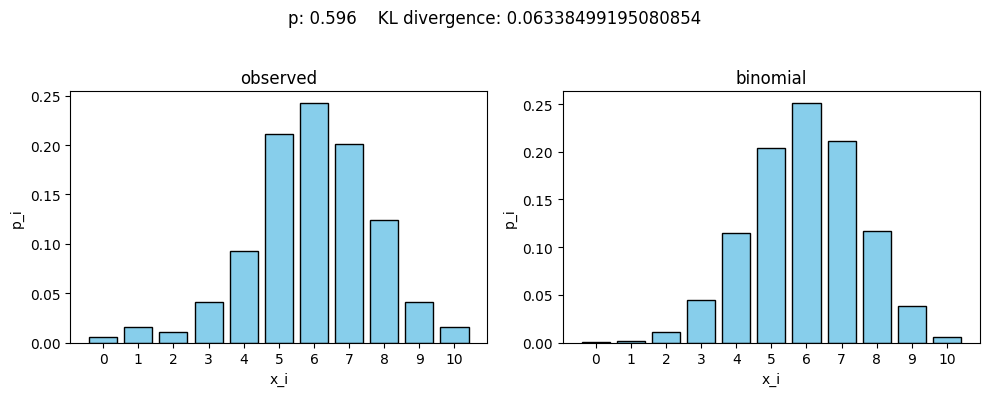

In [3]:
best_bin = probs[divs.index(min(divs))]

binomial = []
for i in range(11):
    binomial.append(binom.pmf(i, 10, best_bin))

plt.figure(figsize=(10, 4))

plt.subplot(1, 2, 1)
plt.bar(x, observations, color='skyblue', edgecolor='black')

plt.title('observed')
plt.xlabel('x_i')
plt.ylabel('p_i')

plt.xticks(range(0, 11))

plt.subplot(1, 2, 2)
plt.bar(x, binomial, color='skyblue', edgecolor='black')

plt.title('binomial')
plt.xlabel('x_i')
plt.ylabel('p_i')

plt.xticks(range(0, 11))

plt.suptitle(f'p: {best_bin}    KL divergence: {min(divs)}')

plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()